<a href="https://colab.research.google.com/github/AkashHiremath856/ML/blob/main/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
digits=load_digits()

In [ ]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


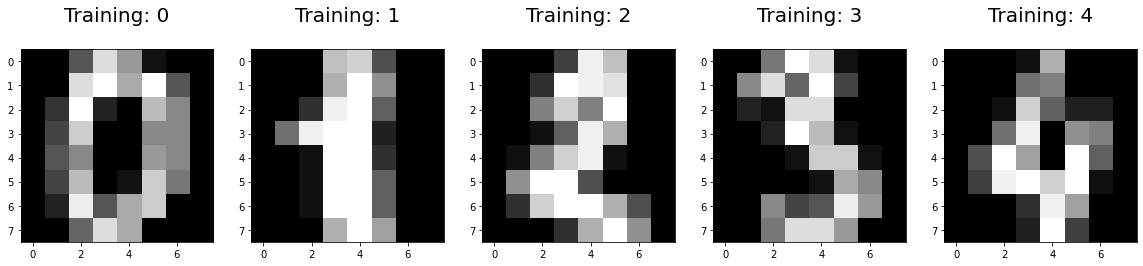

In [ ]:
plt.figure(figsize=(20,4))
for index,(image,label)in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n '% label,fontsize=20)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [ ]:
x_train.shape

(1383, 64)

In [ ]:
y_train.shape

(1383,)

In [ ]:
y_test.shape

(414,)

In [ ]:
x_test.shape

(414, 64)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr=LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [ ]:
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
prediction=logr.predict(x_test)

In [ ]:
score=logr.score(x_test,y_test)

In [ ]:
cm =metrics.confusion_matrix(y_test,predict)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 43,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 36,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 31]])

Text(0.5, 1.0, 'Accurcy: 0.9492753623188406')

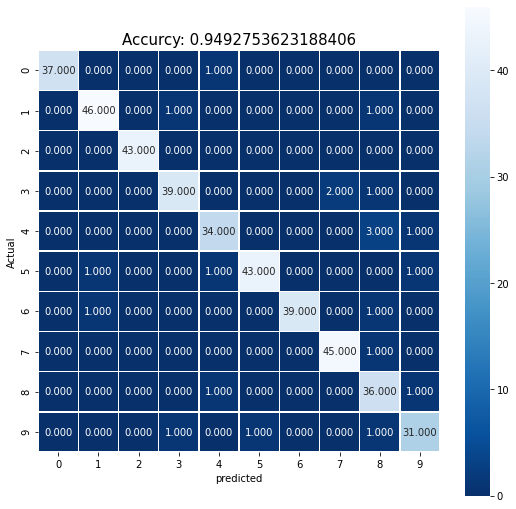

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual')
plt.xlabel('predicted')
all_smaple_title="Accurcy: {}".format(score)
plt.title(all_smaple_title,size=15)

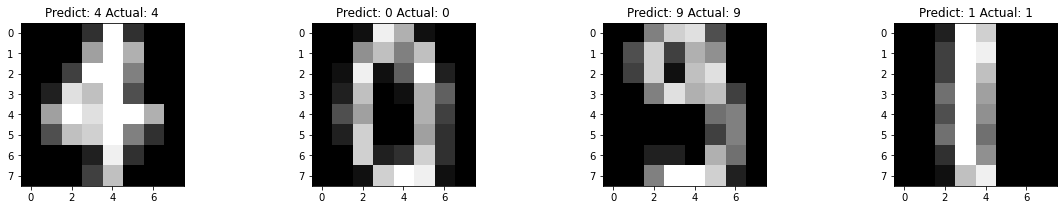

In [ ]:
index=0
misclass=[]
for predict, actual in zip(prediction,y_test):
    if predict==actual:
        misclass.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotindex,wrong in enumerate(misclass[0:4]):
    plt.subplot(1,4,plotindex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predict: {} Actual: {}".format(prediction[wrong],y_test[wrong],fontsize=20))